# Data Preprocessing


## Importing libraries


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('/content/NGA_west2_spectra-2.csv')
x=dataset.iloc[:,2:6].values
y=dataset.iloc[:,7:].values

In [3]:
dataset.head()

,Record Sequence Number,EQID,Earthquake Magnitude,Hypocenter Depth (km),EpiD (km),Vs30 (m/s) selected for analysis,PGA (g),T0.010S,T0.020S,T0.022S,...,T8.500S,T9.000S,T9.500S,T10.000S,T11.000S,T12.000S,T13.000S,T14.000S,T15.000S,T20.000S
0,1,1,6.00,6.0,6.31,593.35,0.157020,0.157476,0.164311,0.165726,...,0.001560,0.001401,0.001265,0.001148,0.000957,0.000809,0.000693,0.000600,0.000525,0.000298
1,3,3,5.80,10.0,73.49,219.31,0.040961,0.040995,0.041169,0.041347,...,0.000281,0.000244,0.000203,0.000183,0.000148,0.000122,0.000103,0.000087,0.000078,0.000045
2,5,5,5.50,10.0,54.88,219.31,0.122180,0.122504,0.125593,0.122460,...,0.000402,0.000349,0.000309,0.000286,0.000232,0.000195,0.000167,0.000145,0.000127,0.000072
3,6,6,6.95,8.8,12.98,213.44,0.233490,0.234202,0.233593,0.233783,...,0.015417,0.012291,0.009600,0.008637,0.007999,0.005429,0.004560,0.003596,0.003120,0.001921
4,11,11,5.80,10.0,55.96,219.31,0.107090,0.107263,0.108287,0.108820,...,0.000503,0.000449,0.000403,0.000364,0.000300,0.000251,0.000214,0.000184,0.000159,0.000089


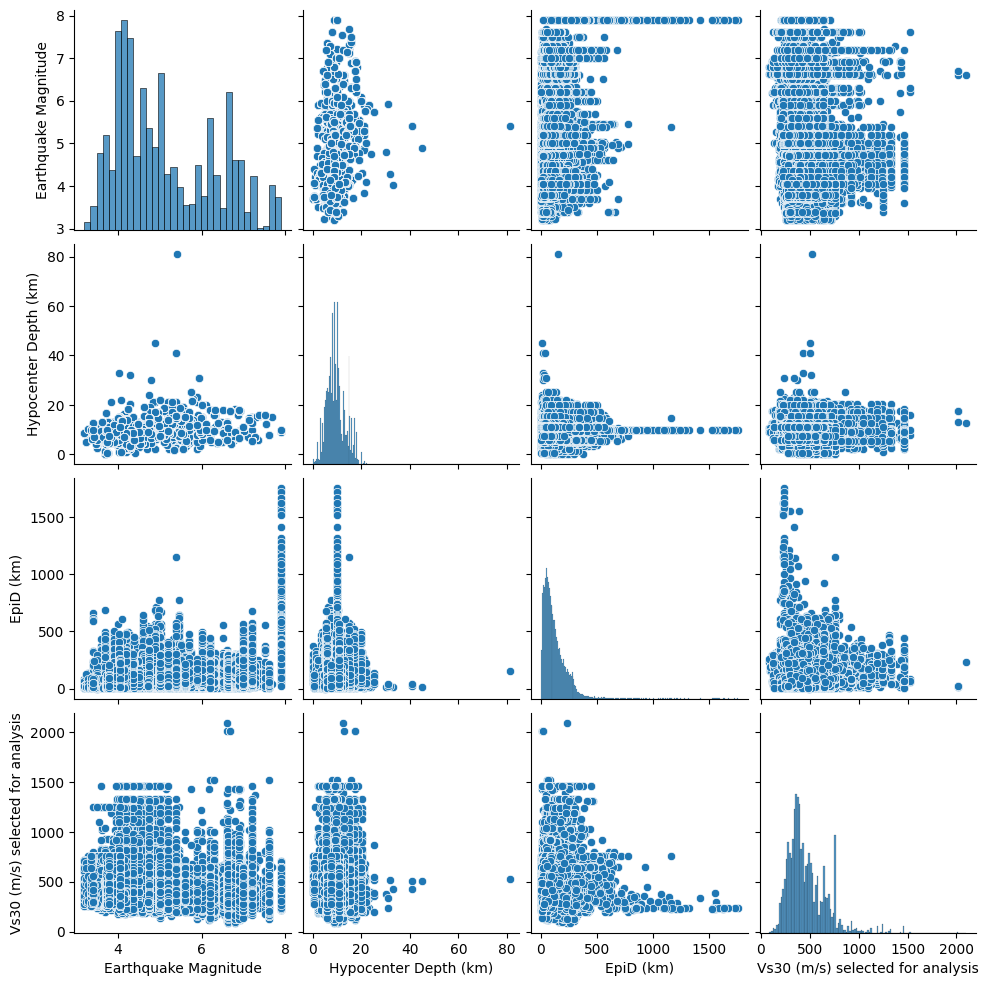

In [4]:
df = pd.DataFrame(dataset.iloc[:,2:6])
sns.pairplot(df)
plt.show()

In [5]:
print(x)
df.info()

[[  6.        6.        6.31    593.35   ]
 [  5.8      10.       73.49    219.31   ]
 [  5.5      10.       54.88    219.31   ]
 ...
 [  3.8       7.59     66.5406  308.     ]
 [  3.8       7.59     91.03774 560.     ]
 [  3.8       7.59     25.7148  274.67   ]]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20783 entries, 0 to 20782
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Earthquake Magnitude              20783 non-null  float64
 1   Hypocenter Depth (km)             20783 non-null  float64
 2   EpiD (km)                         20783 non-null  float64
 3   Vs30 (m/s) selected for analysis  20783 non-null  float64
dtypes: float64(4)
memory usage: 649.6 KB


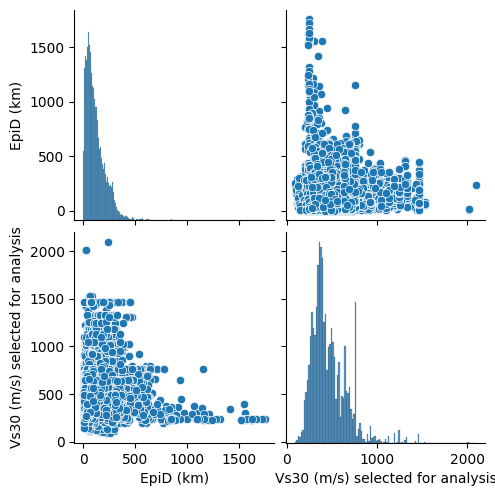

In [6]:
sns.pairplot(df.iloc[:,[2,3]])

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [19]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Create an XGBoost model
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.01)

# Train the model
model.fit(x_train, y_train)

# Make predictions
x_train_xgb = model.apply(x_train)
x_test_xgb = model.apply(x_test)

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_trained=sc.fit_transform(x_train_xgb)
x_tested=sc.transform(x_test_xgb)

In [21]:
ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=10,activation='leaky_relu'))
ann.add(tf.keras.layers.Dense(units=10,activation='leaky_relu'))
ann.add(tf.keras.layers.Dense(units=10,activation='leaky_relu'))
ann.add(tf.keras.layers.Dense(units=111))
ann.compile(optimizer='adam',loss='mse',metrics=['mae']) # loss changed to 'mse', metrics changed to 'mae'
ann.fit(x_trained,y_train,batch_size=128,epochs=200)

Epoch 1/200
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.7086 - mae: 0.4055
Epoch 2/200
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0408 - mae: 0.0666
Epoch 3/200
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0637 - mae: 0.1308
Epoch 4/200
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0233 - mae: 0.0609
Epoch 5/200
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0218 - mae: 0.0569
Epoch 6/200
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0189 - mae: 0.0487
Epoch 7/200
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0188 - mae: 0.0499
Epoch 8/200
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0168 - mae: 0.0458
Epoch 9/200
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0171 - mae: 0.0472
Epoch 10/200
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0197 - mae: 0.0515
Epoch 11/200
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0202 - mae: 0.0589
Epoch 12/200
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0168 - mae: 0.0468
Epoch 13/200


In [22]:
y_pred=ann.predict(x_tested)
# Reshape to (num_samples, num_features)
print(np.concatenate((y_pred, y_test), axis=1))
print(len(y_pred))

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
[[-2.66311318e-03 -3.26093286e-03 -5.51810116e-03 ...  1.09161400e-06
   9.45030400e-07  4.37941900e-07]
 [ 3.00988927e-03  2.83378363e-03  1.23466551e-03 ...  8.87385100e-07
   7.64425800e-07  4.33101200e-07]
 [-2.06805766e-04 -3.98248434e-04 -2.32163072e-03 ...  1.22473400e-07
   1.06651300e-07  5.97841300e-08]
 ...
 [ 1.09108955e-01  1.15443289e-01  1.18477866e-01 ...  3.93028300e-04
   3.07625300e-04  2.02453200e-04]
 [-2.15883553e-03 -2.62510777e-03 -4.81781363e-03 ...  2.12929800e-08
   1.92428800e-08  6.55462100e-09]
 [-2.33630091e-03 -2.76363641e-03 -5.01452386e-03 ...  1.23864500e-07
   1.08058400e-07  6.05701900e-08]]
2079


In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_test_no_nan = np.nan_to_num(y_test)  # Replace NaN with 0

mse = mean_squared_error(y_test_no_nan, y_pred)
mae = mean_absolute_error(y_test_no_nan, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.02037587720078782
Mean Absolute Error: 0.03711522544702879


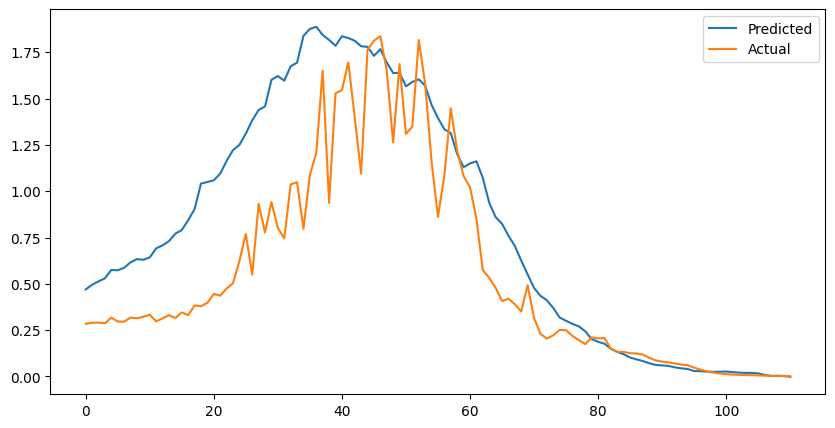

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(y_pred[800], label='Predicted')
plt.plot(y_test[800], label='Actual')
plt.legend()
plt.show()

In [25]:
sample = np.array([[7.2, 5.45, 58.68, 196]])
sample_xgb = model.apply(sample)
sample_scaled = sc.transform(sample_xgb)
prediction = ann.predict(sample_scaled)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
[[ 3.4645250e-01  3.6447126e-01  3.7649897e-01  3.8833082e-01
   4.2179203e-01  4.2121512e-01  4.3416175e-01  4.5834017e-01
   4.6694842e-01  4.7220623e-01  4.8334041e-01  5.2340937e-01
   5.3774798e-01  5.5179369e-01  5.7831717e-01  5.9404111e-01
   6.3258934e-01  6.8407190e-01  7.8349471e-01  7.9543674e-01
   8.0190027e-01  8.4000927e-01  8.9211833e-01  9.3596202e-01
   9.7032487e-01  1.0147798e+00  1.0662127e+00  1.1122483e+00
   1.1415944e+00  1.2375551e+00  1.2584656e+00  1.2412660e+00
   1.3111081e+00  1.3341876e+00  1.4109623e+00  1.4362049e+00
   1.4294513e+00  1.4175636e+00  1.4053143e+00  1.3905145e+00
   1.3998160e+00  1.3977818e+00  1.3660543e+00  1.3323883e+00
   1.3234292e+00  1.2947228e+00  1.2804953e+00  1.2293258e+00
   1.1916275e+00  1.1750997e+00  1.1512672e+00  1.1345487e+00
   1.1147047e+00  1.0859601e+00  1.0277171e+00  9.9272639e-01
   9.6483260e-01  9.1448069e-01  8.4759349e-01  7.8730226e-01
   7.8887784e-01  7.8124595e-01

In [26]:
datastr = np.array(ann.predict(sc.transform(sample_xgb)))
datalist = datastr.flatten().tolist()
df = pd.DataFrame(datalist)
print(df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
            0
0    0.346453
1    0.364471
2    0.376499
3    0.388331
4    0.421792
..        ...
106  0.007423
107  0.003745
108  0.003505
109  0.002595
110 -0.000548

[111 rows x 1 columns]


In [27]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.49482206235720505

In [ ]:
df.to_excel("/content/output.xlsx", index=False, header=False)

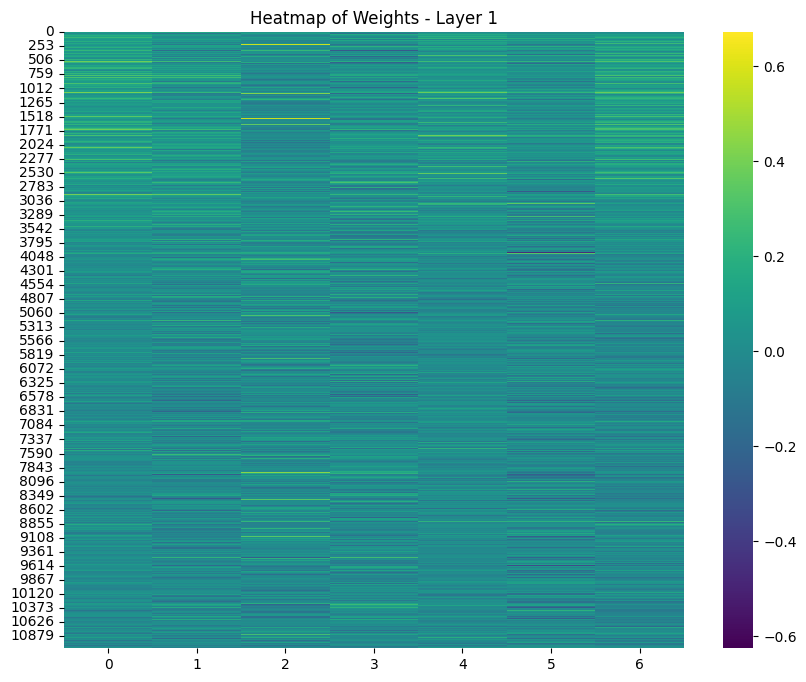

In [ ]:
# Get the weights of the first layer
weights, biases = ann.layers[0].get_weights()

# Plot weights heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(weights, cmap='viridis', annot=False)
plt.title('Heatmap of Weights - Layer 1')
plt.show()

In [ ]:
ann.summary()

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_69 (Dense)                     │ (None, 7)                   │          77,707 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 111)                 │             888 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,787 (921.05 KB)

 Trainable params: 78,595 (307.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 157,192 (614.04 KB)

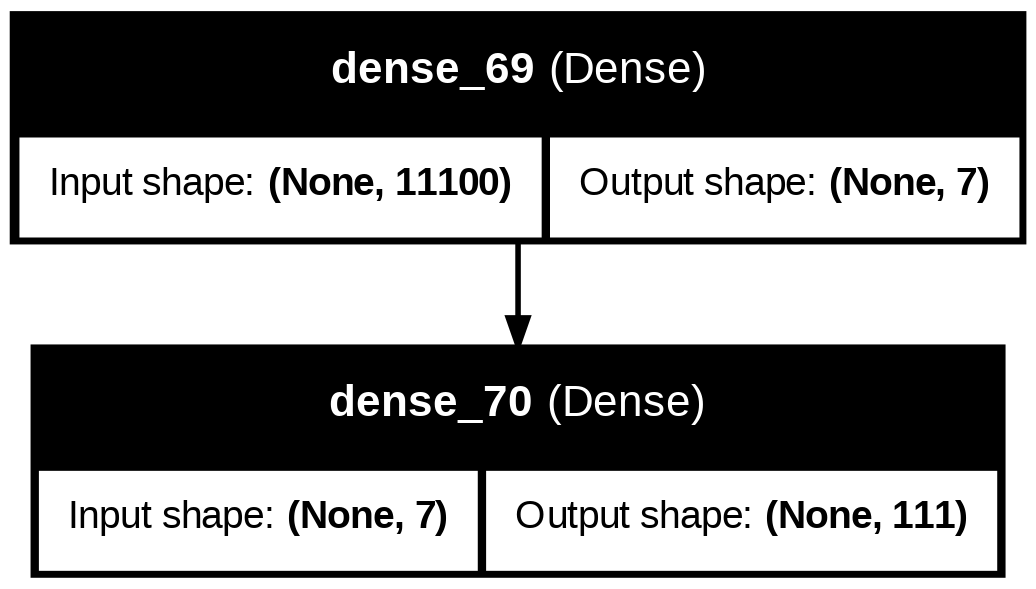

In [ ]:
from tensorflow.keras.utils import plot_model

# Save and plot model architecture
plot_model(ann, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# If running in Jupyter Notebook / Colab
from IPython.display import Image
Image('model_plot.png')